In [2]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [15, 10]

### Setup
* **path** - variable, which refers to path with robot's csv files
* **start** - index of first robot's csv file
* **end** - index of last robot's csv file (open interval, it should be (last + 1) )
* **experiments** - number of experiments

In [3]:
path = '../data/re3simro21..30/'
start = 21 
end = 31
experiments = 3

### Load data from csv file

In [4]:
data = []
names = []
for i in range(start, end):
    for ex in range(1,  experiments + 1):
        filename = 'robot_{}-{}.csv'.format(i,ex) # creating filename
        
        temp = np.genfromtxt(path + filename, delimiter=',') #loading data from file
        temp = temp[~np.isnan(temp)] # deleting last nan value, because the file contains comma after last value
        # so it reads it as nan value, but there is actually no value
        data.append(temp)
        names.append(filename.split(".")[0].split("_")[1]) # we want to omit .csv ending and robot prefix
        
data = pd.DataFrame(dict(zip(names, data)), columns=names)

### Plotting the robots from table

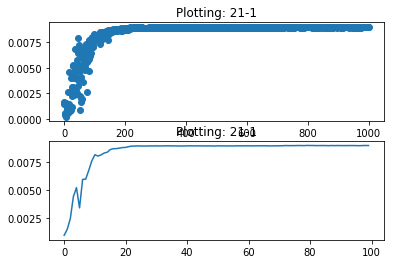

NameError: name 'size' is not defined

In [13]:
for robot in data.columns:
    
    x = np.arange(0, data.shape[0])
    
    plt.subplot(2, 1, 1)
    plt.title("Plotting: {}".format(robot))
    plt.plot(x, data[robot], 'o')
    
    
    #Get 10 group means and then plot
    g10 = data[robot].values.reshape((-1,10))
    g10 = g10.mean(axis=1)
    
    plt.subplot(2, 1, 2)
    plt.title("Plotting: {}".format(robot))
    plt.plot(np.arange(0, g10.size), g10)
    
    plt.show()
    
    
    
    
    print("""
    Number of points plotted:                 {}
    Mean:                                     {}
    std:                                      {}
    Maximmum value:                           {}
    MAximmum value in generation:             {}
    Average Gradient (without outliers):      {}
    Diff (last - first):                      {}
    """.format(data[size].count, 
               data[robot].mean(), 
               data[robot].std(), 
               data[robot].max(),
               data[robot].idxmax(),
               np.gradient(data[robot].as_matrix()).mean(),
               (data[robot].iloc[-1] - data[robot].iloc[0])
              ))

(1000, 30)